# run_all() Function Example

The run all function in exovetter is a way to run a set of vetters on a tce and light curve at a the same time. The function returns a dictionary with the desired vetting results and can return all diagnostic plots in a single pdf. 


In [1]:
from exovetter.tce import Tce
from exovetter import const as exo_const
from exovetter import vetters as vet
from exovetter import utils
import lightkurve as lk
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
We'll start again with our nice WASP-18 b TCE, TPF, and lightcurve

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

In [3]:
tpf = lk.search_targetpixelfile('WASP-18 b', author='SPOC')[0].download()
tpf

TessTargetPixelFile(TICID: 100100827)

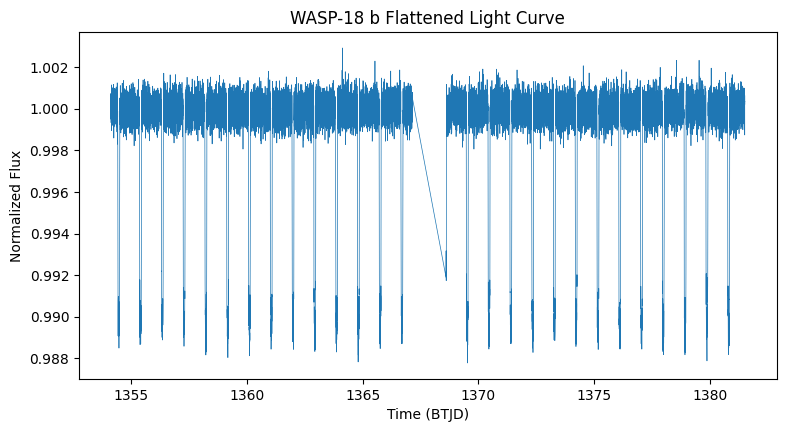

In [4]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

## run_all()

The utils.run_all() function take a tce, light curve, and optionally a tpf, and runs a specified list of vetters on them. The results of each vetter is packed into a dictionary which the function returns. By default it runs every vetter with the plot option set to false.

In [5]:
results = utils.run_all(tce, lc, tpf)
results

/Users/mdallas/Desktop/exovetter/exovetter/lpp.py:380: UserWarning: LPP requires a MES or SNR value stored as snr in the tce. Using a value of 10.0.
  warnings.warn('LPP requires a MES or SNR value stored as snr '
/Users/mdallas/Desktop/exovetter/exovetter/leo.py:16: RuntimeWarning: invalid value encountered in scalar divide
  mean = np.sum(w * y) / np.sum(w)
/Users/mdallas/Desktop/exovetter/exovetter/leo.py:21: RuntimeWarning: divide by zero encountered in divide
  err = 1 / np.sqrt(np.sum(w))


{'num_transits': 28,
 'pri': 0,
 'phase_pri': 0.0,
 'sec': 0,
 'phase_sec': 0.0,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': 62,
 'phase_pos': 0.5559051262857143,
 'sigma_pri': -84048.82717694924,
 'sigma_sec': -84048.82717694924,
 'sigma_ter': -84048.82717694924,
 'sigma_pos': 874.9368307842159,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 98.33624740560738,
 'raw_lpp': 0.00010605318150829946,
 'norm_lpp': 0.123217106738894,
 'oe_sigma': 0.1028040042876017,
 'odd_depth': [0.98964864, 0.00054403394],
 'even_depth': [0.98956954, 0.00054403394],
 'transit_phase_coverage': 1.0,
 'msg': 'OK: SWEET finds no out-of-transit variability at transit period',
 'amp': array([[6.66440271e-07, 5.83201791e-06, 1.14272672e-01],
        [8.90857608e-07, 5.83201641e-06, 1.52752932e-01],
        [1.93617963e-06, 5.83200160e-06, 3.31992300e-01]]),
 'sig_w': 0.0005321934086532481,
 'sig_r': 0,
 'err': 1.2881093446355147e-05,
 'SES_series': array([-0.17422814, -0.08170926, -0.22269192, ..., -0.4538739 ,

Run all can also be used with a plot argument to generate diagnostic plots. Setting plot=True will create a pdf with a vetting plot per page.

In [6]:
utils.run_all(tce, lc, tpf, plot=True)

/Users/mdallas/Desktop/exovetter/exovetter/lpp.py:380: UserWarning: LPP requires a MES or SNR value stored as snr in the tce. Using a value of 10.0.
  warnings.warn('LPP requires a MES or SNR value stored as snr '


{'pri': 0,
 'phase_pri': 0.0,
 'sec': 0,
 'phase_sec': 0.0,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': 62,
 'phase_pos': 0.5559051262857143,
 'sigma_pri': -84048.82717694924,
 'sigma_sec': -84048.82717694924,
 'sigma_ter': -84048.82717694924,
 'sigma_pos': 874.9368307842159,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 98.33624740560738,
 'raw_lpp': 0.00010605318150829946,
 'norm_lpp': 0.123217106738894,
 'oe_sigma': 0.1028040042876017,
 'odd_depth': [0.98964864, 0.00054403394],
 'even_depth': [0.98956954, 0.00054403394],
 'transit_phase_coverage': 1.0,
 'msg': 'OK: SWEET finds no out-of-transit variability at transit period',
 'amp': array([[6.66440271e-07, 5.83201791e-06, 1.14272672e-01],
        [8.90857608e-07, 5.83201641e-06, 1.52752932e-01],
        [1.93617963e-06, 5.83200160e-06, 3.31992300e-01]]),
 'offset': 0.07074984782477667,
 'significance': array([0.95712504])}

Lastly, in order to specify which vetters to use in case only a few are needed a list of the vetting objects with desired initialization settings can be supplied to the 'vetters' argument of utils.run_all(). For this example we use the default ModShift and SWEET vetters in addition to the OddEven vetter with the in-transit duration to use for depth calculation set to 0.9 rather than the defualt 0.3. Note we do not have to supply the tpf since we are not calling vet.Centroid(). 

In [7]:
utils.run_all(tce, lc, vetters=[vet.ModShift(), vet.OddEven(dur_frac=0.9), vet.Sweet()])


{'pri': 0,
 'phase_pri': 0.0,
 'sec': 0,
 'phase_sec': 0.0,
 'ter': 0,
 'phase_ter': 0.0,
 'pos': 62,
 'phase_pos': 0.5559051262857143,
 'sigma_pri': -84048.82717694924,
 'sigma_sec': -84048.82717694924,
 'sigma_ter': -84048.82717694924,
 'sigma_pos': 874.9368307842159,
 'false_alarm_threshold': 1.6702257749203022,
 'Fred': 98.33624740560738,
 'oe_sigma': 0.8375495171525003,
 'odd_depth': [0.99583364, 0.00053129566],
 'even_depth': [0.99646294, 0.00053129566],
 'msg': 'OK: SWEET finds no out-of-transit variability at transit period',
 'amp': array([[6.66440271e-07, 5.83201791e-06, 1.14272672e-01],
        [8.90857608e-07, 5.83201641e-06, 1.52752932e-01],
        [1.93617963e-06, 5.83200160e-06, 3.31992300e-01]])}